#### Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install -q torch-summary

In [ ]:
import torch
from torch import nn
from torch import optim
import numpy as np
import torchvision.transforms as T
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchsummary import summary
import matplotlib

# 1. Build your own convolutional neural network using pytorch

In [ ]:
num_classes = 4

In [ ]:
#create class CNN classification model using nn.module
class CNN_classification(nn.Module):
    def __init__(self,num_classes):
    #define the layers and the sequence of execution inside init
        super(CNN_classification,self).__init__()

        #use conv2d to define the convolution layer
        #input= 224*224*3
        self.conv_1 = nn.Sequential(
                nn.Conv2d(in_channels = 3,out_channels = 32,kernel_size = 5,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 32,out_channels = 32,kernel_size = 3,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 32,out_channels = 32,kernel_size = 3,stride = 1, padding = 1))
        self.cnn1_res = nn.Conv2d(in_channels = 3,out_channels = 32,kernel_size = 3,stride = 1, padding = 0)
        self.batch1 = nn.BatchNorm2d(32)
        self.mpool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_2 = nn.Sequential(
                nn.Conv2d(in_channels = 32,out_channels = 64,kernel_size = 5,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 64,out_channels = 64,kernel_size = 3,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 64,out_channels = 64,kernel_size = 3,stride = 1, padding = 1))
        self.cnn2_res = nn.Conv2d(in_channels = 32,out_channels = 64,kernel_size = 3,stride = 1, padding = 0)
        self.batch2 = nn.BatchNorm2d(64)
        self.mpool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_3 = nn.Sequential(
                nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 5,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 128,out_channels = 128,kernel_size = 3,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 128,out_channels = 128,kernel_size = 3,stride = 1, padding = 1))
        self.cnn3_res = nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,stride = 1, padding = 0)
        self.batch3 = nn.BatchNorm2d(128)
        self.mpool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_4 = nn.Sequential(
                nn.Conv2d(in_channels = 128,out_channels = 256,kernel_size = 5,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3,stride = 1, padding = 1))
        self.cnn4_res = nn.Conv2d(in_channels = 128,out_channels = 256,kernel_size = 3,stride = 1, padding = 0)
        self.batch4 = nn.BatchNorm2d(256)
        self.mpool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_5 = nn.Sequential(
                nn.Conv2d(in_channels = 256,out_channels = 512,kernel_size = 5,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,stride = 1, padding = 1))
        self.cnn5_res = nn.Conv2d(in_channels = 256,out_channels = 512,kernel_size = 3,stride = 1, padding = 0)
        self.batch5 = nn.BatchNorm2d(512)
        self.mpool5 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc_1 = nn.Sequential(
                    nn.Linear(12800,512), #(5*5*512)
                    nn.Dropout(0.4),
                    nn.ReLU(),
                    nn.Linear(512,num_classes))

    def forward(self, x):

        res = x
        #conv 1
        x = self.conv_1(x)
        #residual
        res = self.cnn1_res(res)
        x += res
        x = self.batch1(x)
        x = F.relu(x)
        x = self.mpool1(x)

        res = x
        #conv 2
        x = self.conv_2(x)
        #residual
        res = self.cnn2_res(res)
        x += res
        x = self.batch2(x)
        x = F.relu(x)
        x = self.mpool2(x)

        res = x
        #conv 3
        x = self.conv_3(x)
        #residual
        res = self.cnn3_res(res)
        x += res
        x = self.batch3(x)
        x = F.relu(x)
        x = self.mpool3(x)

        res = x
        #conv 4
        x = self.conv_4(x)
        #residual
        res = self.cnn4_res(res)
        x += res
        x = self.batch4(x)
        x = F.relu(x)
        x = self.mpool4(x)

        res = x
        #conv 5
        x = self.conv_5(x)
        #residual
        res = self.cnn5_res(res)
        x += res
        x = self.batch5(x)
        x = F.relu(x)
        x = self.mpool5(x)

        #print(x.shape)
        x = torch.flatten(x,start_dim = 1)
        #x = x.view(-1,5*5*512)
        #x = x.reshape(x.size(0),-1)

        x = self.fc_1(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
CowTeatCNN = CNN_classification(num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CowTeatCNN.to(device)

CNN_classification(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn1_res): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn2_res): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mpool2): M

In [ ]:
summary(CowTeatCNN,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 222, 222]           2,432
              ReLU-2         [-1, 32, 222, 222]               0
            Conv2d-3         [-1, 32, 222, 222]           9,248
              ReLU-4         [-1, 32, 222, 222]               0
            Conv2d-5         [-1, 32, 222, 222]           9,248
            Conv2d-6         [-1, 32, 222, 222]             896
       BatchNorm2d-7         [-1, 32, 222, 222]              64
         MaxPool2d-8         [-1, 32, 111, 111]               0
            Conv2d-9         [-1, 64, 109, 109]          51,264
             ReLU-10         [-1, 64, 109, 109]               0
           Conv2d-11         [-1, 64, 109, 109]          36,928
             ReLU-12         [-1, 64, 109, 109]               0
           Conv2d-13         [-1, 64, 109, 109]          36,928
           Conv2d-14         [-1, 64, 1

# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code)

### (1) use torchvision.datasets.ImageFolder for the training dataset
### (2) use custom dataloader for test dataset (return image tensor and file name)

#### Train data:

In [ ]:
path = "/content/drive/Shareddrives/School/NN and Deep learning/Cow teat dataset/Train/"

In [ ]:
#define the mean and std for normalizing all the channels in the images
norm = T.Normalize(mean =(0.485,0.456,0.406),std =(0.229,0.224,0.225))

#define size to resize the images
size = (224,224)

#Resize, convert to torch tensor and normalize the image
transform_img = T.Compose([T.Resize(size),T.ToTensor(),norm])

In [ ]:
dataset = ImageFolder(root = path, transform = transform_img)

In [ ]:
print(dataset)

Dataset ImageFolder
    Number of datapoints: 1149
    Root location: /content/drive/Shareddrives/School/NN and Deep learning/Cow teat dataset/Train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )


In [ ]:
print(dataset.class_to_idx)

{'Score_1': 0, 'Score_2': 1, 'Score_3': 2, 'Score_4': 3}


In [ ]:
#split the dataset into train and validation set(80-20)
t_size = int(np.floor(0.8* len(dataset)))
v_size = len(dataset) - t_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset,[t_size,v_size])

In [ ]:
#create data loaders
bs = 16
train_dataloader = DataLoader(train_dataset,bs,shuffle = True)
valid_dataloader = DataLoader(val_dataset,bs)

In [ ]:
'''
#check the no.of classes
def get_class_count(dataset):
    count_dict ={k:0 for k,v in dataset.class_to_idx.items()}

    for input, label in dataset:
        label = idx_to_class[label]
        count_dict[label] +=1

    return count_dict
#print(train_dataloader.class_to_idx)
'''

'\n#check the no.of classes\ndef get_class_count(dataset):\n    count_dict ={k:0 for k,v in dataset.class_to_idx.items()}\n\n    for input, label in dataset:\n        label = idx_to_class[label]\n        count_dict[label] +=1\n\n    return count_dict\n#print(train_dataloader.class_to_idx)\n'

In [ ]:
#pd.DataFrame.from_dict([get_class_count(train_dataset)]).melt()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(CowTeatCNN.parameters(),lr = 0.001)

In [ ]:
epochs = 150
train_accuracy = []
val_accuracy = []
training_loss = []
validation_loss = []

for epoch in range(epochs):
    CowTeatCNN.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    for X,y in train_dataloader:
        X,y = X.to(device), y.to(device)
        optimizer.zero_grad() #set optimizer gradients to 0
        op = CowTeatCNN(X)
        loss = loss_fn(op, y)
        loss.backward() #pass loss function gradients to previous layers
        optimizer.step() #update the weights

        train_loss += loss.item()
        pred = torch.argmax(op,1)
        train_total += y.size(0)
        train_correct += (pred == y).sum().item()

    train_e_loss = train_loss/len(train_dataloader.dataset)
    train_e_accuracy = 100*train_correct/train_total

    CowTeatCNN.train()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X,y in valid_dataloader:
            X,y = X.to(device), y.to(device)
            op = CowTeatCNN(X)
            loss = loss_fn(op, y)
            val_loss += loss.item()*X.size(0)
            pred = torch.argmax(op,1)
            val_total += y.size(0)
            val_correct +=(pred == y).sum().item() #check the val accuracy

    val_e_loss = val_loss/len(valid_dataloader.dataset)
    val_e_accuracy = 100*val_correct/val_total

    #append the accuracy and loss values
    train_accuracy.append(train_e_accuracy)
    training_loss.append(train_e_loss)
    val_accuracy.append(val_e_accuracy)
    validation_loss.append(val_e_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train loss:{train_e_loss:.4f}, Val loss:{val_e_loss:.4f}, Train acc:{train_e_accuracy:.4f}, Val acc:{val_e_accuracy:.4f}")

print("Training completed")

#save the model at the same location as this notebook
torch.save(CowTeatCNN.state_dict(),'/content/drive/Shareddrives/School/NN and Deep learning/Homework 7/CNNmodel3_150.pt')
print("saved the model")

Epoch 1/150, Train loss:0.0807, Val loss:1.1945, Train acc:52.3395, Val acc:65.6522
Epoch 2/150, Train loss:0.0756, Val loss:1.1447, Train acc:59.9565, Val acc:66.9565
Epoch 3/150, Train loss:0.0741, Val loss:1.1220, Train acc:58.8683, Val acc:66.5217
Epoch 4/150, Train loss:0.0732, Val loss:1.1086, Train acc:58.4331, Val acc:66.5217
Epoch 5/150, Train loss:0.0720, Val loss:1.0982, Train acc:60.6094, Val acc:66.9565
Epoch 6/150, Train loss:0.0717, Val loss:1.0846, Train acc:59.9565, Val acc:66.5217
Epoch 7/150, Train loss:0.0711, Val loss:1.0816, Train acc:60.0653, Val acc:67.3913
Epoch 8/150, Train loss:0.0709, Val loss:1.0756, Train acc:59.4124, Val acc:67.8261
Epoch 9/150, Train loss:0.0702, Val loss:1.0670, Train acc:61.1534, Val acc:68.6957
Epoch 10/150, Train loss:0.0702, Val loss:1.0654, Train acc:59.3036, Val acc:68.6957
Epoch 11/150, Train loss:0.0695, Val loss:1.0590, Train acc:60.8270, Val acc:69.1304
Epoch 12/150, Train loss:0.0697, Val loss:1.0562, Train acc:60.8270, Val a

In [ ]:
#save the model at the same location as this notebook
#torch.save(CowTeatCNN.state_dict(),'/content/drive/Shareddrives/School/NN and Deep learning/Homework 7/CNNmodel3.pt')

#### Accuracy and Loss graphs:

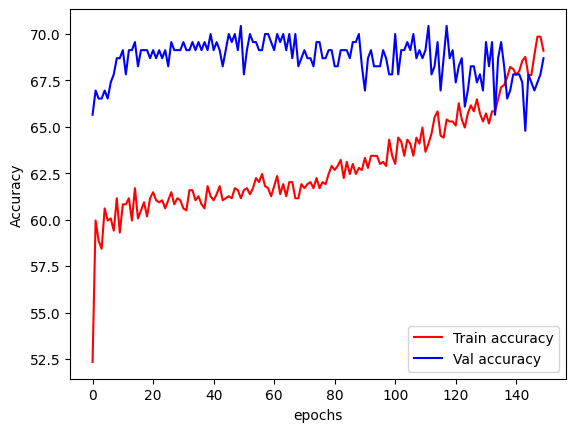

(Text(0.5, 24.0, 'epochs'), Text(24.000000000000007, 0.5, 'Accuracy'), None)

In [ ]:
plt.plot(range(epochs),train_accuracy,'r', label = 'Train accuracy')
plt.plot(range(epochs),val_accuracy,'b',label = 'Val accuracy')
plt.legend()
plt.xlabel('epochs'),plt.ylabel('Accuracy'),plt.show()

In [ ]:
#plt.plot(range(epochs),training_loss,'r',label ='Train loss')
#plt.plot(range(epochs),validation_loss,'b',label = 'Val loss')
#plt.legend()
#plt.xlabel('epochs'),plt.ylabel('Loss'),plt.show()

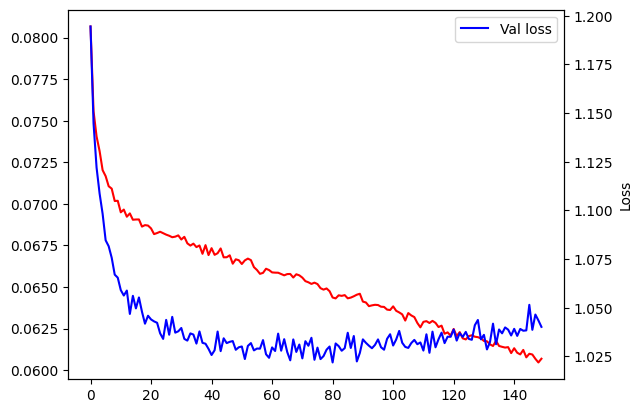

(Text(0.5, 0, 'epochs'), Text(618.8749999999999, 0.5, 'Loss'), None)

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(epochs),training_loss,'r',label ='Train loss')
ax2.plot(range(epochs),validation_loss,'b',label = 'Val loss')
plt.legend()
plt.xlabel('epochs'),plt.ylabel('Loss'),plt.show()

#### Test dataloader:

In [ ]:
Test_path = "/content/drive/Shareddrives/School/NN and Deep learning/Cow teat dataset/Test/"

Test_Normalized_img = []#list for normalized images
Test_filename = []

#accessing each image file listed from the path
for file in os.listdir(Test_path):
    Test_filename.append(file)

    #read the image from a particular location
    test_img = Image.open(Test_path+file)
    #Resize, convert to torch tensor and normalize the image
    transform_img = T.Compose([T.Resize(size),T.ToTensor(),norm])
    test_img_normalized = transform_img(test_img)#.unsqueeze(0).to(device)
    #append the normalized images to the list
    Test_Normalized_img.append(test_img_normalized)

#create a test dataloader with train normalize image and shuffle
test_dataloader = DataLoader(list(zip(Test_Normalized_img,Test_filename)),
                                               batch_size = 8)


#assign the values from it to the normalized image and labels
Test_image, f_name = next(iter(test_dataloader))

In [ ]:
y_pred = []
file_name = []
with torch.no_grad():
    CowTeatCNN.eval()
    for X,y in test_dataloader:
        if torch.cuda.is_available():
            X = X.cuda()
        op = CowTeatCNN(X)
        _, predicted = torch.max(op,1)
        preds = np.squeeze(predicted.cpu().numpy())
        y_pred.extend(preds)
        file_name.extend(y)

In [ ]:
#calling pre-trained model

#model = CNN_classification(num_classes)
#model.load_state_dict(torch.load('/content/drive/Shareddrives/School/NN and Deep learning/Homework 7/Model 3 output/CNNmodel3_1.pt'))

#saved trained model
'''
y_pred = []
file_name = []
with torch.no_grad():
    model.eval()
    for X,y in test_dataloader:
        if torch.cuda.is_available():
            X = X.cuda()
        op = CowTeatCNN(X)
        _, predicted = torch.max(op,1)
        preds = np.squeeze(predicted.cpu().numpy())
        y_pred.extend(preds)
        file_name.extend(y)
'''

In [ ]:
#y_pred

# 3. Evaluate your model using the developed software

In [ ]:
df = pd.DataFrame({'Filename':file_name,'Predictions':y_pred})
df.to_csv('/content/drive/Shareddrives/School/NN and Deep learning/Homework 7/df_custom_CNN3_150.csv',index = False, header = False)

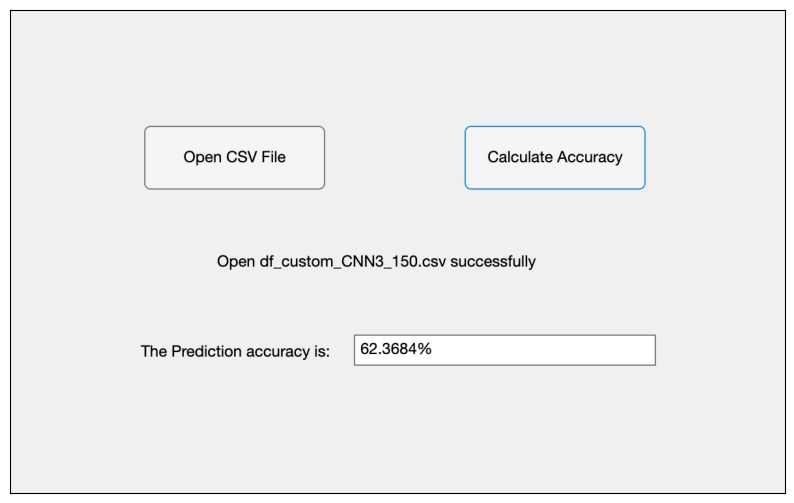

In [ ]:
sc = plt.imread("/content/drive/Shareddrives/School/NN and Deep learning/Homework 7/CNN3_150.jpeg")
plt.figure(figsize = (10,12))
plt.imshow(sc), plt.xticks([]),plt.yticks([])
plt.show()

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

#### Test accuracy for this model is 62.37%

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

https://www.researchgate.net/publication/375494398_Convolution_Neural_Network_Image_Classification_of_Dairy_Cow_Teats_for_Health